<a href="https://colab.research.google.com/github/syx1990/deep-learning/blob/main/lris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0, loss: 0.2821310982108116
Test_acc: 0.16666666666666666
--------------------------
Epoch 1, loss: 0.25459614023566246
Test_acc: 0.16666666666666666
--------------------------
Epoch 2, loss: 0.22570250555872917
Test_acc: 0.16666666666666666
--------------------------
Epoch 3, loss: 0.21028399094939232
Test_acc: 0.16666666666666666
--------------------------
Epoch 4, loss: 0.19942264631390572
Test_acc: 0.16666666666666666
--------------------------
Epoch 5, loss: 0.18873637914657593
Test_acc: 0.5
--------------------------
Epoch 6, loss: 0.17851300165057182
Test_acc: 0.5333333333333333
--------------------------
Epoch 7, loss: 0.16922875866293907
Test_acc: 0.5333333333333333
--------------------------
Epoch 8, loss: 0.16107673197984695
Test_acc: 0.5333333333333333
--------------------------
Epoch 9, loss: 0.15404684096574783
Test_acc: 0.5333333333333333
--------------------------
Epoch 10, loss: 0.14802725613117218
Test_acc: 0.5333333333333333
--------------------------
Epoch 11,

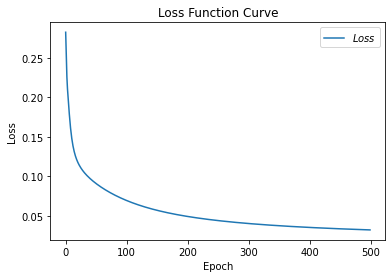

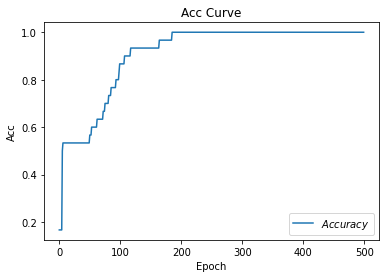

In [36]:
# -*- coding: utf-8 -*-
# !/usr/bin/python3
# author by : yuxiangShi
# tell  by: 18538187569
# desc by: 鸢尾花分类

# 思路分析：

# 导入所需要的包
import tensorflow as tf 
from sklearn import datasets 
from pandas import DataFrame #格式化数据使用
import pandas as pd # 包装数据输出
from matplotlib import pyplot as plt # 画图的包
import numpy as np

# 获取鸢尾花的数据
data =  datasets.load_iris()

# 获取鸢尾花的特征和标签
x_data = data.data # 返回iris数据集所有特征
y_data = data.target # 返回iris数据集所有标签 0:狗尾草鸢尾 1：杂色鸢尾 2：弗吉尼亚鸢尾

# print("输出鸢尾花的所有特征（（花萼长、花萼宽）、（花瓣长、花瓣宽））:",x_data)
# print("输出鸢尾花的标签：",y_data)

# # 优化数据结构，并输出
# x_data = DataFrame(x_data,columns=['花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度']) # # 为表格增加行索引（左侧）和列标签（上方）
# pd.set_option('display.unicode.east_asian_width',True)

# x_data['类别'] = y_data # 新加一列，列标签为‘类别’，数据为y_data
# print("x_data add a column: \n", x_data)

# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样（为方便教学，以保每位同学结果一致）
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test  = x_data[-30:]
y_test  = y_data[-30:]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)  # 转换为tf.float32类型
x_test  = tf.cast(x_test, tf.float32)

# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db  = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同（方便教学，使大家结果都一致，在现实使用时不写seed）
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr                 = 0.1  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc           = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch              = 500  # 循环500轮
loss_all           = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和

# 训练
for epoch in range(epoch): #数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  #batch级别的循环 ，每个step循环一个batch
        with tf.GradientTape() as tape:  
           # with结构记录梯度信息
           y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
           y = tf.nn.softmax(y) # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
           y_ = tf.one_hot(y_train,depth=3) # 将标签值转换为独热码格式，方便计算loss和accuracy
           loss = tf.reduce_mean(tf.square(y_ - y)) # 采用均方误差损失函数mse = mean(sum(y-out)^2)
           loss_all +=loss.numpy() # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss,[w1,b1])

        # 实现梯度更新 w1 = w1 - lr * w1_grad    b = b - lr * b_grad
        w1.assign_sub(lr*grads[0]) # 参数w1自更新
        b1.assign_sub(lr*grads[1]) # 参数b自更新

    # 每个epoch，打印loss信息    
    print("Epoch {}, loss: {}".format(epoch, loss_all/4))
    train_loss_results.append(loss_all / 4)
    loss_all = 0 # loss_all归零，为记录下一个epoch的loss做准备
    
    # 测试
    total_correct,total_number = 0,0 # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    for x_test,y_test in test_db:
      # 使用更新后的参数进行预测
      y = tf.matmul(x_test,w1) + b1
      y = tf.nn.softmax(y)
      pred = tf.argmax(y,axis=1) # 返回y中最大值的索引，即预测的分类
      # 将pred转换为y_test的数据类型
      pred = tf.cast(pred,dtype=y_test.dtype)
      # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
      correct= tf.cast(tf.equal(pred,y_test),dtype=tf.int32)
      # 将每个batch的correct数加起来,0+1+0+1....
      correct = tf.reduce_sum(correct)
      # 将所有batch中的correct数加起来
      total_correct += int(correct)
      # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
      total_number += x_test.shape[0]
    
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")


# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()

